# Analysis - Per Capita Victims by Race and Gender

### 1. Prepare Workspace

In [1]:
# Import data analysis libraries
import numpy as np
import pandas as pd

# Import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set appearance parameters
pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set(style='whitegrid', font_scale=2,
        rc={'axes.facecolor':'white',
            'font.family':'sans-serif',
            'font.sans-serif':['Avenir']})

# Set graph colours
dblue = '#2971b1'
mblue = '#6bacd0'
lblue = '#c2deec'
lired = '#f7ccb4'
mered = '#e48165'
dared = '#ba3132'
palette = [dblue, mblue, lblue, lired, mered, dared]

# Hide extra warnings
import warnings
warnings.filterwarnings(action='once')

# Read in data
other = 'Two or More Races'
df_vic = pd.read_csv('Data - Fatal Police Shootings.csv')
df_total = pd.read_excel('Data - Population Census.xlsx', sheet_name='Total')
df_white = pd.read_excel('Data - Population Census.xlsx', sheet_name='White')
df_black = pd.read_excel('Data - Population Census.xlsx', sheet_name='Black')
df_asian = pd.read_excel('Data - Population Census.xlsx', sheet_name='Asian')
df_aian = pd.read_excel('Data - Population Census.xlsx', sheet_name='AIAN')
df_nhpi = pd.read_excel('Data - Population Census.xlsx', sheet_name='NHPI')
df_other = pd.read_excel('Data - Population Census.xlsx', sheet_name=other)

/opt/anaconda3/lib/python3.7/site-packages/xlrd/xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


### 2. Select Data

In [3]:
#### FORMAT VICTIM DATA ####
# Select data from complete years
data = df_vic[df_vic['date'].str[:4] != '2020'][['race', 'gender']]
# Replace blank values with 'Not Reported' and add titles for races
data['race'] = data['race'].fillna('Not Reported')
races = {'W': 'White', 'B': 'Black', 'H': 'Hispanic',
         'A': 'Asian', 'N': 'Native', 'O': 'Other'}
data['race'] = data['race'].replace(races)
# Add titles for genders
gender = {'M': 'Male', 'F': 'Female'}
data['gender'] = data['gender'].replace(gender)
# Create table of average deaths per year by race and gender
data = pd.DataFrame(data.groupby(['race', 'gender']).size()/5)
data = data.reset_index().rename(columns={0: 'number'})

#### ADD DATA FOR WHITE POPULATION ####
# Drop rows where all values are missing
df_white = df_white.dropna(how='all')
# Make year row the column head
years = [int(i) for i in df_white.iloc[3] if str(i)[0].isnumeric()]
other = [i for i in df_white.iloc[3] if str(i)[0].isnumeric() == False]
df_white.columns = other + years
# Get average population between 2015 and 2019
m_pop, f_pop = 0, 0
for i in range(2015, 2020):
    m_pop += df_white[df_white[np.NaN] == '..MALE'].iloc[0][i]
    f_pop += df_white[df_white[np.NaN] == '..FEMALE'].iloc[0][i]
m_pop, f_pop = m_pop/5, f_pop/5
# Add average population to data
q = (data['race'] == 'White')
data['pop'] = np.where(q & (data['gender'] == 'Male'), m_pop, np.NaN)
data['pop'] = np.where(q & (data['gender'] == 'Female'), f_pop, data['pop'])

#### ADD DATA FOR BLACK POPULATION ####
# Drop rows where all values are missing
df_black = df_black.dropna(how='all')
# Make year row the column head
years = [int(i) for i in df_black.iloc[3] if str(i)[0].isnumeric()]
other = [i for i in df_black.iloc[3] if str(i)[0].isnumeric() == False]
df_black.columns = other + years
# Get average population between 2015 and 2019
m_pop, f_pop = 0, 0
for i in range(2015, 2020):
    m_pop += df_black[df_black[np.NaN] == '.MALE'].iloc[0][i]
    f_pop += df_black[df_black[np.NaN] == '.FEMALE'].iloc[0][i]
m_pop, f_pop = m_pop/5, f_pop/5
# Add average population to data
q = (data['race'] == 'Black')
data['pop'] = np.where(q & (data['gender'] == 'Male'), m_pop, data['pop'])
data['pop'] = np.where(q & (data['gender'] == 'Female'), f_pop, data['pop'])

#### ADD DATA FOR HISPANIC POPULATION ####
# Drop rows where all values are missing
df_total = df_total.dropna(how='all')
# Make year row the column head
years = [int(i) for i in df_total.iloc[3] if str(i)[0].isnumeric()]
other = [i for i in df_total.iloc[3] if str(i)[0].isnumeric() == False]
df_total.columns = other + years
# Get average population between 2015 and 2019
m_pop, f_pop = 0, 0
for i in range(2015, 2020):
    m_hisp_b = df_black[df_black[np.NaN] == '..MALE'].iloc[1][i]
    f_hisp_b = df_black[df_black[np.NaN] == '..FEMALE'].iloc[1][i]
    m_pop += df_total[df_total[np.NaN] == '..MALE'].iloc[1][i] - m_hisp_b
    f_pop += df_total[df_total[np.NaN] == '..FEMALE'].iloc[1][i] - f_hisp_b
m_pop, f_pop = m_pop/5, f_pop/5
# Add average population to data
q = (data['race'] == 'Hispanic')
data['pop'] = np.where(q & (data['gender'] == 'Male'), m_pop, data['pop'])
data['pop'] = np.where(q & (data['gender'] == 'Female'), f_pop, data['pop'])

#### ADD DATA FOR ASIAN POPULATION ####
# Drop rows where all values are missing
df_asian = df_asian.dropna(how='all')
# Make year row the column head
years = [int(i) for i in df_asian.iloc[3] if str(i)[0].isnumeric()]
other = [i for i in df_asian.iloc[3] if str(i)[0].isnumeric() == False]
df_asian.columns = other + years
# Get average population between 2015 and 2019
m_pop, f_pop = 0, 0
for i in range(2015, 2020):
    m_pop += df_asian[df_asian[np.NaN] == '..MALE'].iloc[0][i]
    f_pop += df_asian[df_asian[np.NaN] == '..FEMALE'].iloc[0][i]
m_pop, f_pop = m_pop/5, f_pop/5
# Add average population to data
q = (data['race'] == 'Asian')
data['pop'] = np.where(q & (data['gender'] == 'Male'), m_pop, data['pop'])
data['pop'] = np.where(q & (data['gender'] == 'Female'), f_pop, data['pop'])

#### ADD DATA FOR NATIVE POPULATION ####
# Drop rows where all values are missing
df_aian = df_aian.dropna(how='all')
df_nhpi = df_nhpi.dropna(how='all')
# Make year row the column head
years = [int(i) for i in df_aian.iloc[3] if str(i)[0].isnumeric()]
other = [i for i in df_aian.iloc[3] if str(i)[0].isnumeric() == False]
df_aian.columns = other + years
df_nhpi.columns = other + years
# Get average population between 2015 and 2019
m_pop, f_pop = 0, 0
for i in range(2015, 2020):
    m_pop += df_aian[df_aian[np.NaN] == '..MALE'].iloc[0][i]
    f_pop += df_aian[df_aian[np.NaN] == '..FEMALE'].iloc[0][i]
    m_pop += df_nhpi[df_nhpi[np.NaN] == '..MALE'].iloc[0][i]
    f_pop += df_nhpi[df_nhpi[np.NaN] == '..FEMALE'].iloc[0][i]
m_pop, f_pop = m_pop/5, f_pop/5
# Add average population to data
q = (data['race'] == 'Native')
data['pop'] = np.where(q & (data['gender'] == 'Male'), m_pop, data['pop'])
data['pop'] = np.where(q & (data['gender'] == 'Female'), f_pop, data['pop'])

#### ADD DATA FOR OTHER POPULATION ####
# Drop rows where all values are missing
df_other = df_other.dropna(how='all')
# Make year row the column head
years = [int(i) for i in df_other.iloc[3] if str(i)[0].isnumeric()]
other = [i for i in df_other.iloc[3] if str(i)[0].isnumeric() == False]
df_other.columns = other + years
# Get average population between 2015 and 2019
m_pop, f_pop = 0, 0
for i in range(2015, 2020):
    m_pop += df_other[df_other[np.NaN] == '..MALE'].iloc[0][i]
    f_pop += df_other[df_other[np.NaN] == '..FEMALE'].iloc[0][i]
m_pop, f_pop = m_pop/5, f_pop/5
# Add average population to data
q = (data['race'] == 'Other')
data['pop'] = np.where(q & (data['gender'] == 'Male'), m_pop, data['pop'])
data['pop'] = np.where(q & (data['gender'] == 'Female'), f_pop, data['pop'])

# Calculate victims per 1M race and gender population
data['percap'] = round(data['number']/data['pop'] * 1000000, 2)

### 3. Conduct Analysis

In [4]:
data.sort_values(by='percap', ascending=False)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,race,gender,number,pop,percap
3,Black,Male,229.6,20752148.0,11.06
7,Native,Male,14.0,1473845.8,9.50
5,Hispanic,Male,162.8,28167517.4,5.78
13,White,Male,431.0,97463568.8,4.42
11,Other,Male,8.4,3412401.4,2.46
1,Asian,Male,16.2,8623950.0,1.88
6,Native,Female,1.0,1505767.0,0.66
2,Black,Female,9.2,22584637.2,0.41
12,White,Female,25.0,100191601.0,0.25
4,Hispanic,Female,4.8,27528050.8,0.17


### 4. Create Visualization

Text(0, 0.5, 'Average Police Shooting Victims per 1M Population')

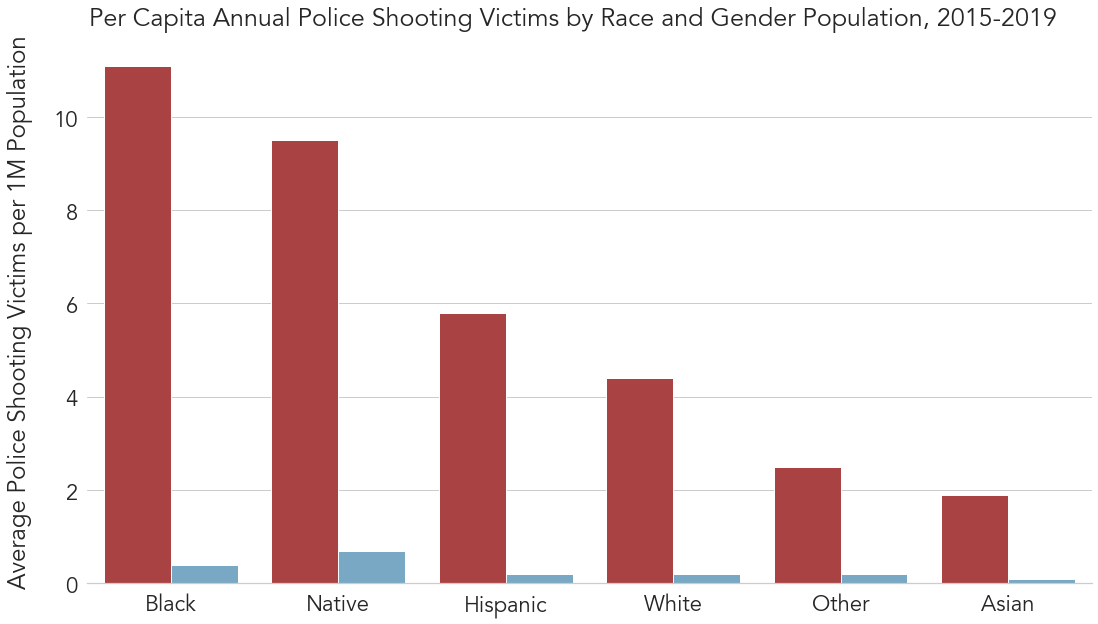

In [15]:
# Plot data
plt.figure(figsize=(18, 10))
g_data = data[data['race'] != 'Not Reported']
order = ['Black', 'Native', 'Hispanic', 'White', 'Other', 'Asian']
horder = ['Male', 'Female']
ax = sns.barplot(data=g_data, order=order, hue='gender', hue_order=horder,
                 x='race', y='percap', palette=[dared, mblue])

# Create title
title = 'Per Capita Annual Police Shooting Victims by Race and Gender Population, 2015-2019'
plt.figtext(.5,.9, title, fontsize=25, ha='center')

# Format axes
sns.despine(left=True)

# Formal legend
ax.legend_.remove()

# Set graph information
plt.xlabel('', labelpad=20)
plt.ylabel('Average Police Shooting Victims per 1M Population', labelpad=20)

# Export graphic
#plt.savefig('Per Capita by Race and Gender.svg', b_boxinches='tight', transparent=True)